# Import Necessary Libraries

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Import Datasets

1. Since data is in form of excel file we have to use pandas read_excel to load the data
2. After loading it is important to check the complete information of data as it can indication many of the hidden infomation such as null values in a column or a row
3. Check whether any null values are there or not. if it is present then following can be done,
4.Imputing data using Imputation method in sklearn
5. Filling NaN values with mean, median and mode using fillna() method
6. Describe data --> which can give statistical analysis

# Loading Datasets

In [56]:
train_data = pd.read_excel("dataset/Data_Train.xlsx")
pd.set_option('display.max_columns',None)
train_data.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

# Information about attribute

In [57]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# Removing Null values

In [58]:
train_data.dropna(inplace=True)

# Looking for Null Values

In [59]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Exploratory Data Analysis

In [60]:
train_data['Journey_day'] = pd.to_datetime(train_data['Date_of_Journey'], format = '%d/%m/%Y').dt.day
train_data['Journey_month'] = pd.to_datetime(train_data['Date_of_Journey'], format = '%d/%m/%Y').dt.month

In [61]:
train_data.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897   
1    05:50         13:15   7h 25m     2 stops         No info   7662   
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882   
3    18:05         23:30   5h 25m      1 stop         No info   6218   
4    16:50         21:35   4h 45m      1 stop         No info  13302   

   Journey_day  Journey_month  
0           24              3  
1            1              5  
2            9              6  
3           12              5  
4            1              3

In [62]:
train_data.drop(['Date_of_Journey'],axis=1,inplace=True)

In [63]:
train_data.head()

Airline    Source Destination                  Route Dep_Time  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    22:20   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR    05:50   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK    09:25   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR    18:05   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL    16:50   

   Arrival_Time Duration Total_Stops Additional_Info  Price  Journey_day  \
0  01:10 22 Mar   2h 50m    non-stop         No info   3897           24   
1         13:15   7h 25m     2 stops         No info   7662            1   
2  04:25 10 Jun      19h     2 stops         No info  13882            9   
3         23:30   5h 25m      1 stop         No info   6218           12   
4         21:35   4h 45m      1 stop         No info  13302            1   

   Journey_month  
0              3  
1              5  
2              6  
3              5  
4              3

In [64]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

In [65]:
train_data['Dep_hour'] = pd.to_datetime(train_data['Dep_Time']).dt.hour
train_data['Dep_min'] = pd.to_datetime(train_data['Dep_Time']).dt.minute

/tmp/ipykernel_82118/2475614797.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data['Dep_hour'] = pd.to_datetime(train_data['Dep_Time']).dt.hour
/tmp/ipykernel_82118/2475614797.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data['Dep_min'] = pd.to_datetime(train_data['Dep_Time']).dt.minute


In [66]:
train_data.head()

Airline    Source Destination                  Route Dep_Time  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    22:20   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR    05:50   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK    09:25   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR    18:05   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL    16:50   

   Arrival_Time Duration Total_Stops Additional_Info  Price  Journey_day  \
0  01:10 22 Mar   2h 50m    non-stop         No info   3897           24   
1         13:15   7h 25m     2 stops         No info   7662            1   
2  04:25 10 Jun      19h     2 stops         No info  13882            9   
3         23:30   5h 25m      1 stop         No info   6218           12   
4         21:35   4h 45m      1 stop         No info  13302            1   

   Journey_month  Dep_hour  Dep_min  
0              3        22       20  
1              5         5       50  
2              6         9       25  
3              5        18        5  
4              3        16       50

In [67]:
train_data.drop(['Dep_Time'],axis=1, inplace=True)

In [68]:
train_data.head()

Airline    Source Destination                  Route  Arrival_Time  \
0       IndiGo  Banglore   New Delhi              BLR → DEL  01:10 22 Mar   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR         13:15   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK  04:25 10 Jun   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR         23:30   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL         21:35   

  Duration Total_Stops Additional_Info  Price  Journey_day  Journey_month  \
0   2h 50m    non-stop         No info   3897           24              3   
1   7h 25m     2 stops         No info   7662            1              5   
2      19h     2 stops         No info  13882            9              6   
3   5h 25m      1 stop         No info   6218           12              5   
4   4h 45m      1 stop         No info  13302            1              3   

   Dep_hour  Dep_min  
0        22       20  
1         5       50  
2         9       25  
3        18        5  
4        16       50

In [69]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

In [70]:
train_data['Arrival_hour'] = pd.to_datetime(train_data['Arrival_Time']).dt.hour
train_data['Arrival_minute'] = pd.to_datetime(train_data['Arrival_Time']).dt.minute
train_data.drop(['Arrival_Time'],axis=1,inplace=True)

/tmp/ipykernel_82118/4213609752.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data['Arrival_hour'] = pd.to_datetime(train_data['Arrival_Time']).dt.hour
/tmp/ipykernel_82118/4213609752.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data['Arrival_minute'] = pd.to_datetime(train_data['Arrival_Time']).dt.minute


In [71]:
train_data.head()

Airline    Source Destination                  Route Duration  \
0       IndiGo  Banglore   New Delhi              BLR → DEL   2h 50m   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7h 25m   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK      19h   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR   5h 25m   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL   4h 45m   

  Total_Stops Additional_Info  Price  Journey_day  Journey_month  Dep_hour  \
0    non-stop         No info   3897           24              3        22   
1     2 stops         No info   7662            1              5         5   
2     2 stops         No info  13882            9              6         9   
3      1 stop         No info   6218           12              5        18   
4      1 stop         No info  13302            1              3        16   

   Dep_min  Arrival_hour  Arrival_minute  
0       20             1              10  
1       50            13              15  
2       25             4              25  
3        5            23              30  
4       50            21              35

In [72]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time

In [73]:
train_data.Duration.value_counts()

Duration
2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: count, Length: 368, dtype: int64

In [74]:
# Assigning and converting Duration column into list
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [75]:
train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [76]:
train_data.drop(['Duration'],axis=1,inplace=True)

In [77]:
train_data.head(3)

Airline    Source Destination                  Route Total_Stops  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    non-stop   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR     2 stops   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK     2 stops   

  Additional_Info  Price  Journey_day  Journey_month  Dep_hour  Dep_min  \
0         No info   3897           24              3        22       20   
1         No info   7662            1              5         5       50   
2         No info  13882            9              6         9       25   

   Arrival_hour  Arrival_minute  Duration_hours  Duration_mins  
0             1              10               2             50  
1            13              15               7             25  
2             4              25              19              0

# Handling Categorical Data

# One can find many ways to handle categorical data. Some of them categorical data are,

1. **Nominal data** --> data are not in any order --> **OneHotEncoder** is used in this case
2. **Ordinal data** --> data are in order --> **LabelEncoder** is used in this case

In [78]:
train_data['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [79]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

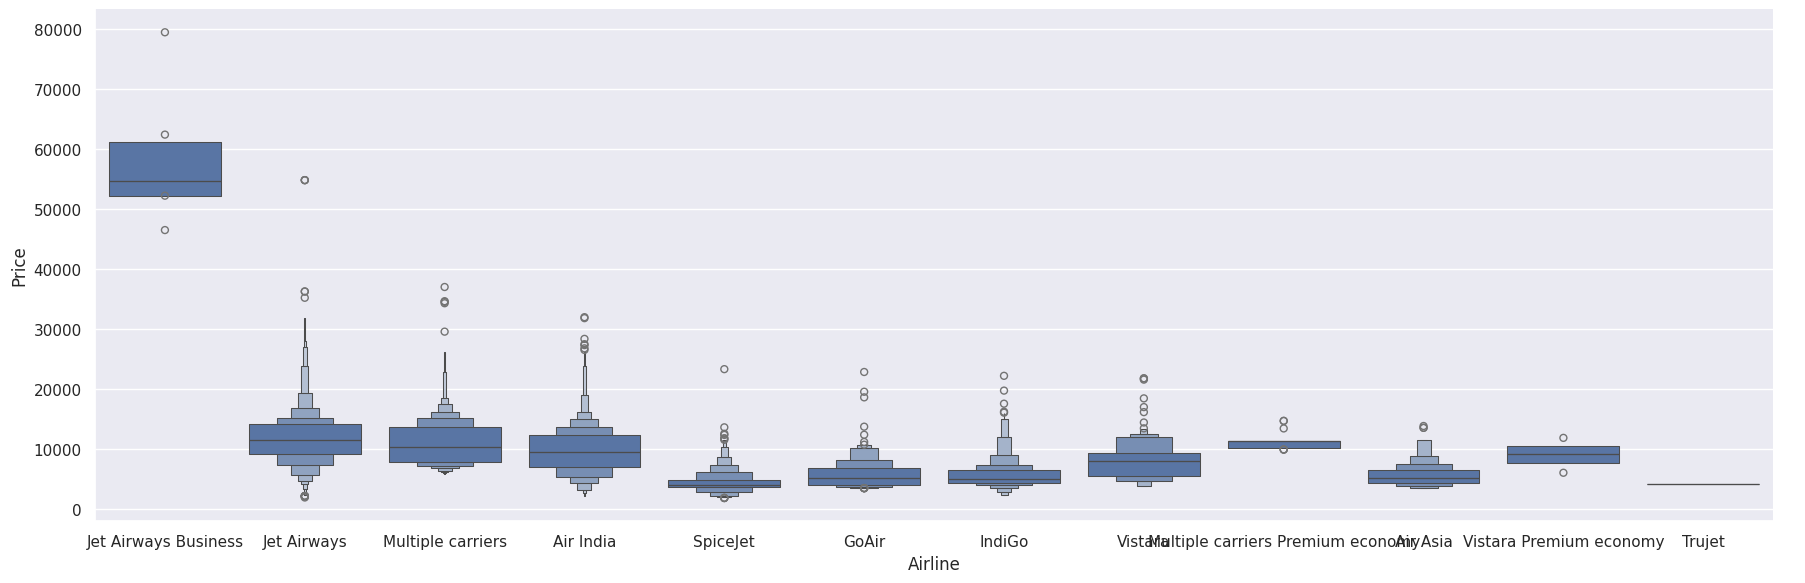

In [80]:
# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [81]:
## As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline = train_data['Airline']
Airline = pd.get_dummies(Airline, drop_first=True)
Airline.head()

Air India  GoAir  IndiGo  Jet Airways  Jet Airways Business  \
0      False  False    True        False                 False   
1       True  False   False        False                 False   
2      False  False   False         True                 False   
3      False  False    True        False                 False   
4      False  False    True        False                 False   

   Multiple carriers  Multiple carriers Premium economy  SpiceJet  Trujet  \
0              False                              False     False   False   
1              False                              False     False   False   
2              False                              False     False   False   
3              False                              False     False   False   
4              False                              False     False   False   

   Vistara  Vistara Premium economy  
0    False                    False  
1    False                    False  
2    False                    False  
3    False                    False  
4    False                    False

In [82]:
train_data['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

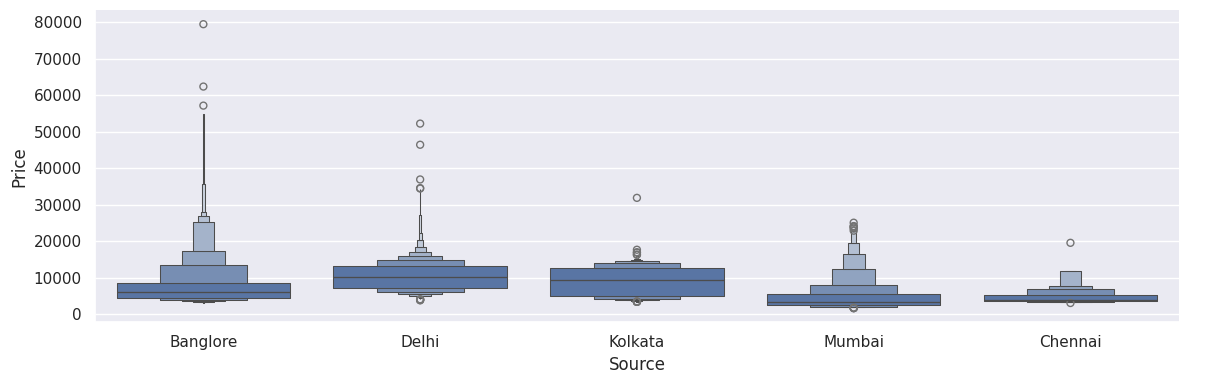

In [83]:
sns.catplot(y = "Price", x = "Source",data= train_data.sort_values("Price", ascending=False), kind = "boxen", height = 4, aspect = 3)
plt.show()

In [84]:
Source = train_data['Source']
Source = pd.get_dummies(Source, drop_first=True)
Source.head()

Chennai  Delhi  Kolkata  Mumbai
0    False  False    False   False
1    False  False     True   False
2    False   True    False   False
3    False  False     True   False
4    False  False    False   False

In [85]:
train_data['Destination'].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [86]:
Destination = train_data['Destination']
Destination = pd.get_dummies(Destination, drop_first=True)
Destination.head()

Cochin  Delhi  Hyderabad  Kolkata  New Delhi
0   False  False      False    False       True
1   False  False      False    False      False
2    True  False      False    False      False
3   False  False      False    False      False
4   False  False      False    False       True

In [87]:
train_data['Route'].value_counts()

Route
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: count, Length: 128, dtype: int64

In [88]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

train_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [89]:
train_data.head()

Airline    Source Destination Total_Stops  Price  Journey_day  \
0       IndiGo  Banglore   New Delhi    non-stop   3897           24   
1    Air India   Kolkata    Banglore     2 stops   7662            1   
2  Jet Airways     Delhi      Cochin     2 stops  13882            9   
3       IndiGo   Kolkata    Banglore      1 stop   6218           12   
4       IndiGo  Banglore   New Delhi      1 stop  13302            1   

   Journey_month  Dep_hour  Dep_min  Arrival_hour  Arrival_minute  \
0              3        22       20             1              10   
1              5         5       50            13              15   
2              6         9       25             4              25   
3              5        18        5            23              30   
4              3        16       50            21              35   

   Duration_hours  Duration_mins  
0               2             50  
1               7             25  
2              19              0  
3               5             25  
4               4             45

In [90]:
train_data["Total_Stops"].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [91]:

# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

train_data.replace({'non-stop':0, '1 stop': 1, '2 stops':2, '3 stops': 3, '4 stops': 4},inplace=True)
train_data.head()

/tmp/ipykernel_82118/2960728997.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data.replace({'non-stop':0, '1 stop': 1, '2 stops':2, '3 stops': 3, '4 stops': 4},inplace=True)


Airline    Source Destination  Total_Stops  Price  Journey_day  \
0       IndiGo  Banglore   New Delhi            0   3897           24   
1    Air India   Kolkata    Banglore            2   7662            1   
2  Jet Airways     Delhi      Cochin            2  13882            9   
3       IndiGo   Kolkata    Banglore            1   6218           12   
4       IndiGo  Banglore   New Delhi            1  13302            1   

   Journey_month  Dep_hour  Dep_min  Arrival_hour  Arrival_minute  \
0              3        22       20             1              10   
1              5         5       50            13              15   
2              6         9       25             4              25   
3              5        18        5            23              30   
4              3        16       50            21              35   

   Duration_hours  Duration_mins  
0               2             50  
1               7             25  
2              19              0  
3               5             25  
4               4             45

In [92]:
data_train = pd.concat([train_data, Airline, Source, Destination], axis=1)

In [93]:
data_train.head()

Airline    Source Destination  Total_Stops  Price  Journey_day  \
0       IndiGo  Banglore   New Delhi            0   3897           24   
1    Air India   Kolkata    Banglore            2   7662            1   
2  Jet Airways     Delhi      Cochin            2  13882            9   
3       IndiGo   Kolkata    Banglore            1   6218           12   
4       IndiGo  Banglore   New Delhi            1  13302            1   

   Journey_month  Dep_hour  Dep_min  Arrival_hour  Arrival_minute  \
0              3        22       20             1              10   
1              5         5       50            13              15   
2              6         9       25             4              25   
3              5        18        5            23              30   
4              3        16       50            21              35   

   Duration_hours  Duration_mins  Air India  GoAir  IndiGo  Jet Airways  \
0               2             50      False  False    True        False   
1               7             25       True  False   False        False   
2              19              0      False  False   False         True   
3               5             25      False  False    True        False   
4               4             45      False  False    True        False   

   Jet Airways Business  Multiple carriers  Multiple carriers Premium economy  \
0                 False              False                              False   
1                 False              False                              False   
2                 False              False                              False   
3                 False              False                              False   
4                 False              False                              False   

   SpiceJet  Trujet  Vistara  Vistara Premium economy  Chennai  Delhi  \
0     False   False    False                    False    False  False   
1     False   False    False                    False    False  False   
2     False   False    False                    False    False   True   
3     False   False    False                    False    False  False   
4     False   False    False                    False    False  False   

   Kolkata  Mumbai  Cochin  Delhi  Hyderabad  Kolkata  New Delhi  
0    False   False   False  False      False    False       True  
1     True   False   False  False      False    False      False  
2    False   False    True  False      False    False      False  
3     True   False   False  False      False    False      False  
4    False   False   False  False      False    False       True

In [94]:
data_train.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [95]:
data_train.head()

Total_Stops  Price  Journey_day  Journey_month  Dep_hour  Dep_min  \
0            0   3897           24              3        22       20   
1            2   7662            1              5         5       50   
2            2  13882            9              6         9       25   
3            1   6218           12              5        18        5   
4            1  13302            1              3        16       50   

   Arrival_hour  Arrival_minute  Duration_hours  Duration_mins  Air India  \
0             1              10               2             50      False   
1            13              15               7             25       True   
2             4              25              19              0      False   
3            23              30               5             25      False   
4            21              35               4             45      False   

   GoAir  IndiGo  Jet Airways  Jet Airways Business  Multiple carriers  \
0  False    True        False                 False              False   
1  False   False        False                 False              False   
2  False   False         True                 False              False   
3  False    True        False                 False              False   
4  False    True        False                 False              False   

   Multiple carriers Premium economy  SpiceJet  Trujet  Vistara  \
0                              False     False   False    False   
1                              False     False   False    False   
2                              False     False   False    False   
3                              False     False   False    False   
4                              False     False   False    False   

   Vistara Premium economy  Chennai  Delhi  Kolkata  Mumbai  Cochin  Delhi  \
0                    False    False  False    False   False   False  False   
1                    False    False  False     True   False   False  False   
2                    False    False   True    False   False    True  False   
3                    False    False  False     True   False   False  False   
4                    False    False  False    False   False   False  False   

   Hyderabad  Kolkata  New Delhi  
0      False    False       True  
1      False    False      False  
2      False    False      False  
3      False    False      False  
4      False    False       True

In [96]:
data_train.shape

(10682, 30)

# Test Data

In [97]:
test_data = pd.read_excel('dataset/Test_set.xlsx')

In [98]:
test_data.head()

Airline Date_of_Journey    Source Destination            Route  \
0        Jet Airways       6/06/2019     Delhi      Cochin  DEL → BOM → COK   
1             IndiGo      12/05/2019   Kolkata    Banglore  CCU → MAA → BLR   
2        Jet Airways      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
3  Multiple carriers      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
4           Air Asia      24/06/2019  Banglore       Delhi        BLR → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops              Additional_Info  
0    17:30  04:25 07 Jun  10h 55m      1 stop                      No info  
1    06:20         10:20       4h      1 stop                      No info  
2    19:15  19:00 22 May  23h 45m      1 stop  In-flight meal not included  
3    08:00         21:00      13h      1 stop                      No info  
4    23:55  02:45 25 Jun   2h 50m    non-stop                      No info

In [99]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)





Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

/tmp/ipykernel_82118/255246789.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
/tmp/ipykernel_82118/255246789.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
/tmp/ipykernel_82118/255246789.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
/tmp/ipykernel_82118/255246789.py:29: UserWarning: Could not infer format, so each element will be parsed indivi

In [100]:
print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

Airline
---------------------------------------------------------------------------
Airline
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: count, dtype: int64

Source
---------------------------------------------------------------------------
Source
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: count, dtype: int64

Destination
---------------------------------------------------------------------------
Destination
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: count, dtype: 

/tmp/ipykernel_82118/1080649782.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)


In [101]:
data_test.head()

Total_Stops  Journey_day  Journey_month  Dep_hour  Dep_min  Arrival_hour  \
0            1            6              6        17       30             4   
1            1           12              5         6       20            10   
2            1           21              5        19       15            19   
3            1           21              5         8        0            21   
4            0           24              6        23       55             2   

   Arrival_min  Duration_hours  Duration_mins  Air India  GoAir  IndiGo  \
0           25              10             55      False  False   False   
1           20               4              0      False  False    True   
2            0              23             45      False  False   False   
3            0              13              0      False  False   False   
4           45               2             50      False  False   False   

   Jet Airways  Jet Airways Business  Multiple carriers  \
0         True                 False              False   
1        False                 False              False   
2         True                 False              False   
3        False                 False               True   
4        False                 False              False   

   Multiple carriers Premium economy  SpiceJet  Vistara  \
0                              False     False    False   
1                              False     False    False   
2                              False     False    False   
3                              False     False    False   
4                              False     False    False   

   Vistara Premium economy  Chennai  Delhi  Kolkata  Mumbai  Cochin  Delhi  \
0                    False    False   True    False   False    True  False   
1                    False    False  False     True   False   False  False   
2                    False    False   True    False   False    True  False   
3                    False    False   True    False   False    True  False   
4                    False    False  False    False   False   False   True   

   Hyderabad  Kolkata  New Delhi  
0      False    False      False  
1      False    False      False  
2      False    False      False  
3      False    False      False  
4      False    False      False

# Feature Selection
Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,


In [102]:
# 1.**heatmap**
#2.**feature_importance_**
#3.**SelectKBest**

In [103]:
data_train.shape

(10682, 30)

In [104]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_minute', 'Duration_hours',
       'Duration_mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

In [105]:
X = data_train.loc[:,['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_minute', 'Duration_hours',
       'Duration_mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi']]

In [106]:
X.head()

Total_Stops  Journey_day  Journey_month  Dep_hour  Dep_min  Arrival_hour  \
0            0           24              3        22       20             1   
1            2            1              5         5       50            13   
2            2            9              6         9       25             4   
3            1           12              5        18        5            23   
4            1            1              3        16       50            21   

   Arrival_minute  Duration_hours  Duration_mins  Air India  GoAir  IndiGo  \
0              10               2             50      False  False    True   
1              15               7             25       True  False   False   
2              25              19              0      False  False   False   
3              30               5             25      False  False    True   
4              35               4             45      False  False    True   

   Jet Airways  Jet Airways Business  Multiple carriers  \
0        False                 False              False   
1        False                 False              False   
2         True                 False              False   
3        False                 False              False   
4        False                 False              False   

   Multiple carriers Premium economy  SpiceJet  Trujet  Vistara  \
0                              False     False   False    False   
1                              False     False   False    False   
2                              False     False   False    False   
3                              False     False   False    False   
4                              False     False   False    False   

   Vistara Premium economy  Chennai  Delhi  Delhi  Kolkata  Kolkata  Mumbai  \
0                    False    False  False  False    False    False   False   
1                    False    False  False  False     True    False   False   
2                    False    False   True  False    False    False   False   
3                    False    False  False  False     True    False   False   
4                    False    False  False  False    False    False   False   

   Cochin  Delhi  Delhi  Hyderabad  Kolkata  Kolkata  New Delhi  
0   False  False  False      False    False    False       True  
1   False  False  False      False     True    False      False  
2    True   True  False      False    False    False      False  
3   False  False  False      False     True    False      False  
4   False  False  False      False    False    False       True

In [107]:
y = data_train.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

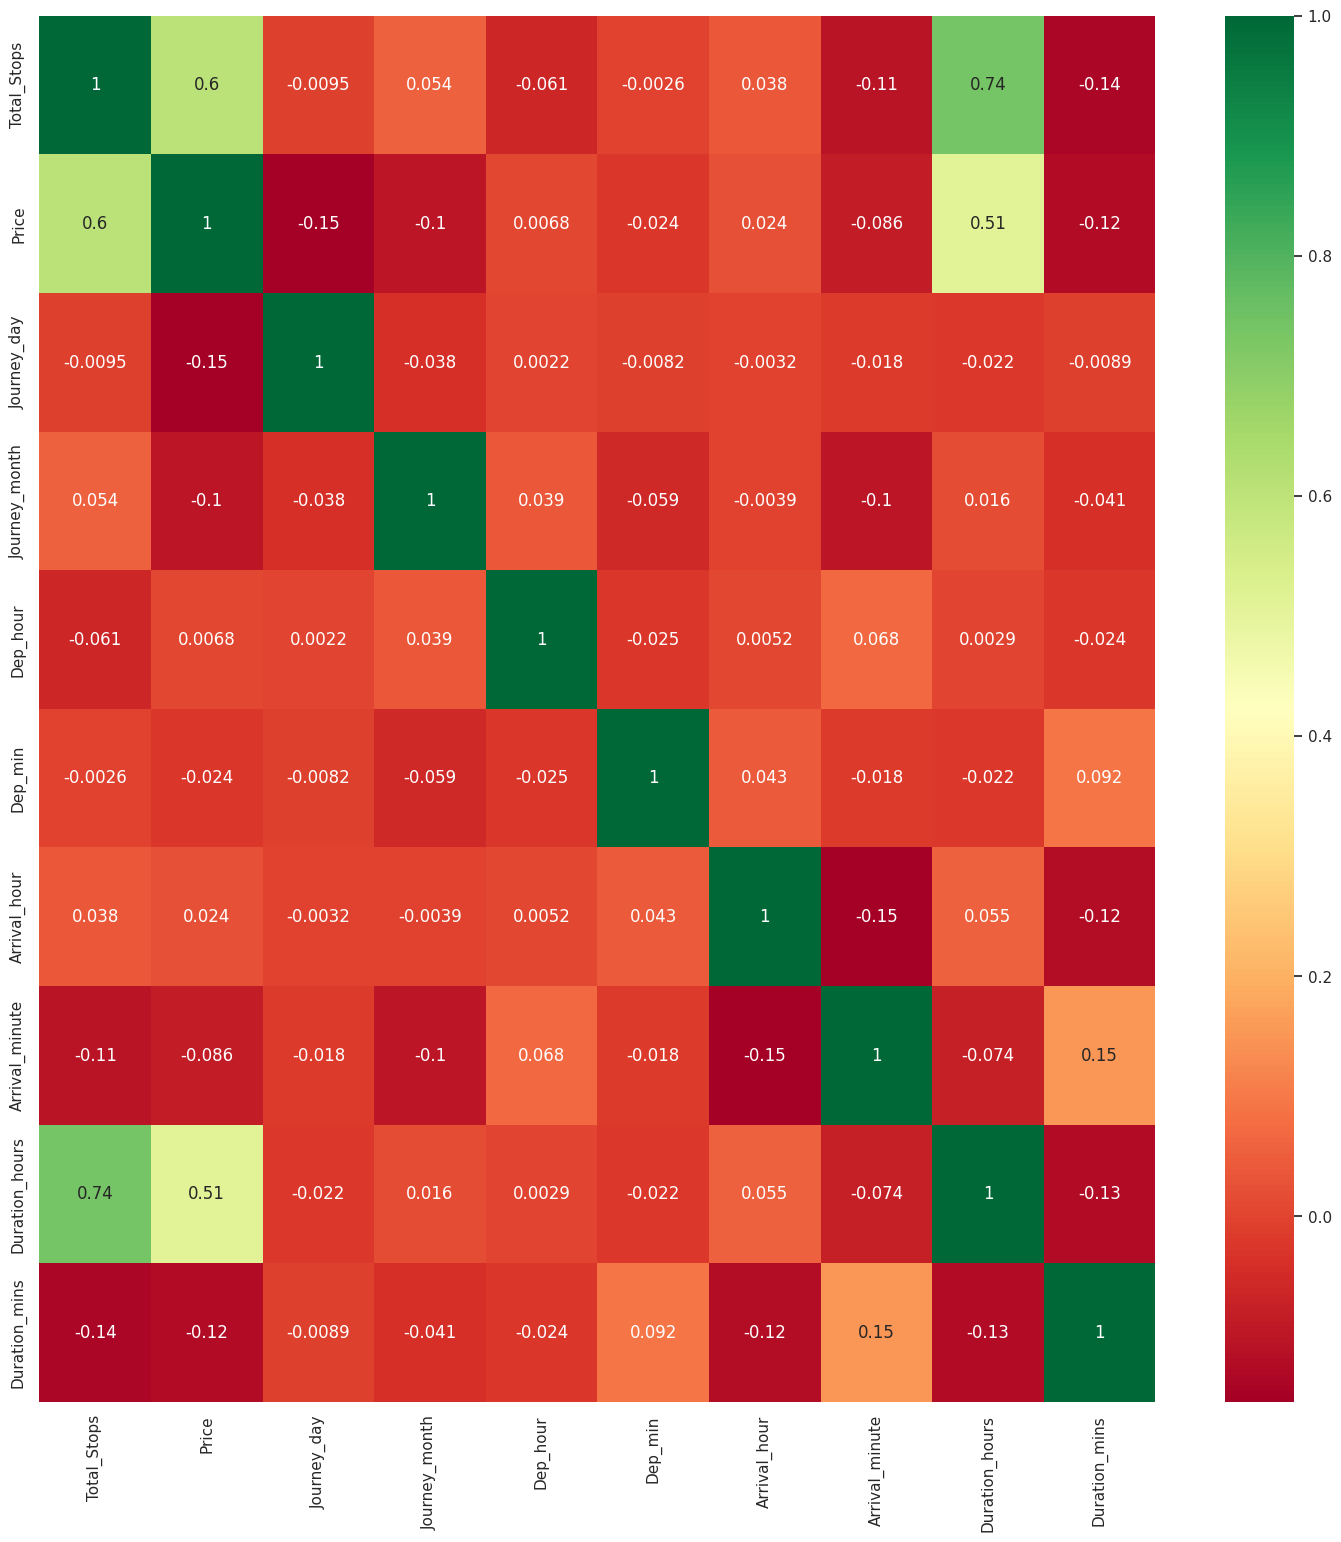

In [108]:
# Remove non-numeric columns
numeric_data = train_data.select_dtypes(include=['number'])

# Finds correlation between Independent and dependent attributes
plt.figure(figsize = (18,18))
sns.heatmap(numeric_data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [109]:

# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [110]:
print(selection.feature_importances_)

[2.42018205e-01 1.44715660e-01 5.29261888e-02 2.44283166e-02
 2.12444058e-02 2.84244687e-02 1.88734649e-02 1.08911645e-01
 1.73742840e-02 8.73042052e-03 1.74350528e-03 1.88018025e-02
 1.39023152e-01 6.68417895e-02 1.87031695e-02 8.48104886e-04
 3.48000870e-03 1.11626588e-04 4.81711318e-03 9.47350922e-05
 3.27126934e-04 7.44482788e-03 7.90051407e-03 1.82685570e-03
 3.02008013e-04 7.31498250e-03 3.87438435e-03 6.74090992e-03
 7.99764770e-03 7.21813866e-03 1.94411107e-03 3.27086639e-04
 2.46693397e-02]


# Fitting model using Random Forest

In [111]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# K Neighbor Regressor

In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
knn_regressor=KNeighborsRegressor(n_neighbors=1)
knn_regressor.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [113]:
y_pred = knn_regressor.predict(X_test)

In [114]:
knn_regressor.score(X_train,y_train)

0.9384372963520724

In [115]:
knn_regressor.score(X_test,y_test)

0.4779054939710744

/tmp/ipykernel_82118/1175811509.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


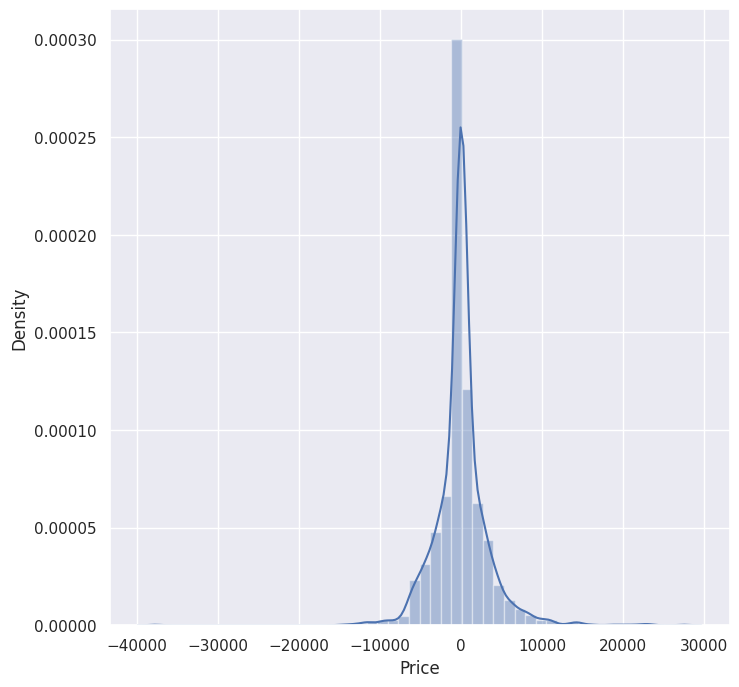

In [116]:
plt.figure(figsize=(8,8))
sns.distplot(y_test-y_pred)
plt.show()

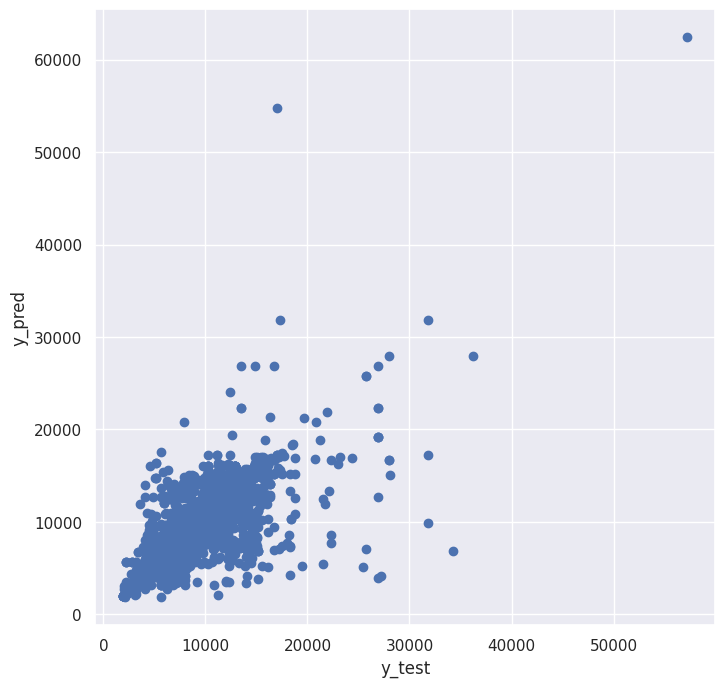

In [117]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [118]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("MSE:", metrics.mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 1973.3373888628919
MSE: 11257431.145531118
RMSE: 3355.209553147332


# Hyper Parameters Tunning

In [119]:
from sklearn.model_selection import cross_val_score

In [120]:
accuracy_rate = []

for i in range(1,40):
    knn = KNeighborsRegressor(n_neighbors=i)
    score = cross_val_score(knn, X_train,y_train,cv=10,scoring='neg_mean_squared_error')
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy Rate')

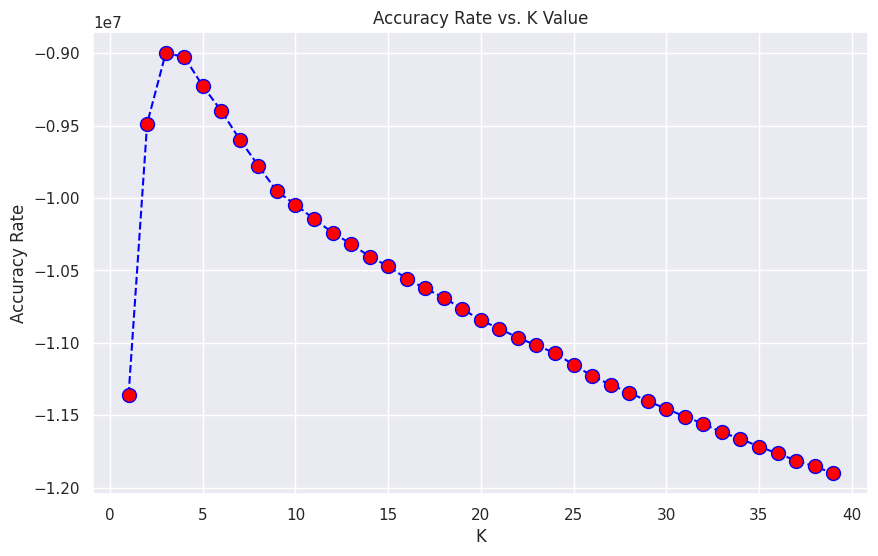

In [121]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [122]:
knn = KNeighborsRegressor(n_neighbors=3)

knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

/tmp/ipykernel_82118/2131792714.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


<Axes: xlabel='Price', ylabel='Density'>

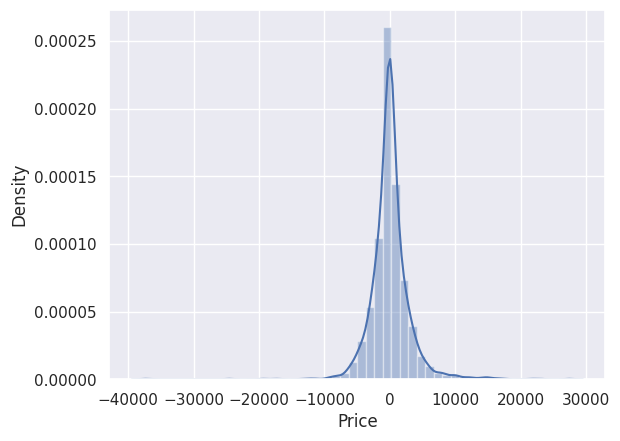

In [123]:
sns.distplot(y_test-predictions)

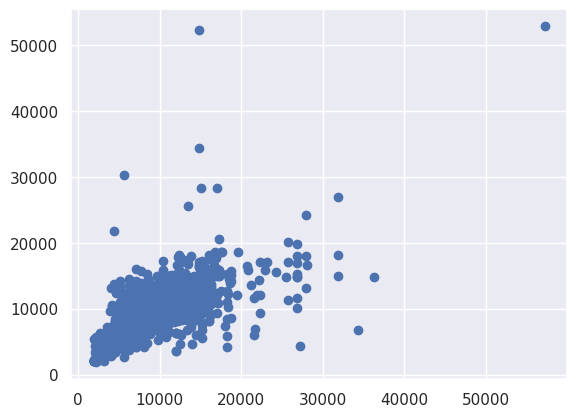

In [124]:
plt.scatter(y_test,predictions)

In [125]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("MSE:",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 1973.3373888628919
MSE: 11257431.145531118
RMSE 3355.209553147332


In [126]:
metrics.r2_score(y_test,y_pred)

0.4779054939710744